In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython) {
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import warnings
warnings.filterwarnings('ignore')
# import all relevant func and modules from a companion .py file
from supp_lib import *
# import all samples as dictionary ...
from samples import *

In [4]:
# so-called master list - union of CTCF and RAD21 peaks - as a collection of biologically relevant locations ...
feature_of_interest = "union_RAD21_CTCF.bed"

## Read `feature_of_interest` that we want to look at using stackups ...
### we can also generate some random locations from hg19 using `generate_random_bed` ...

In [5]:
# bf is short for bioframe here ...
df = bf.read_table(
    feature_of_interest,
    names=["chrom","start","end"],
    usecols=(0,1,2),
    index_col=None
)
df = df.sort_values(["chrom","start"])
df = df[df["chrom"].isin(autosomal_chroms)]
df = df.reset_index(drop=True)

### explore spacing and footprints of the features being explored ...

simply plot distributions of the spacings between adjacent features and their sizes `end - start`  as well ...


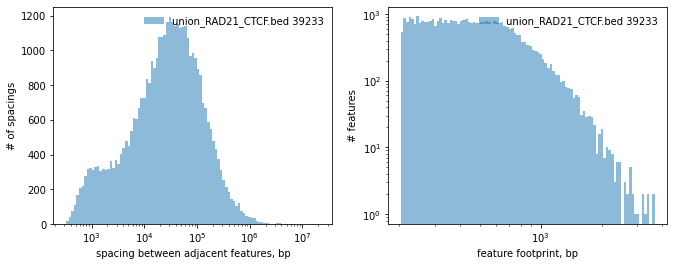

In [6]:
plot_spacing_footprint_distros({
    feature_of_interest : df
})

### in our analyses (insulation/compartments) we wouldn't resolve features that are too close ...
#### let's see what clustering those adjacent ones could do for us
#### let's try to pick a good clustering "radius" first - should be  around ~1-10kb ...

it's actually merging that we're doing - i.e. we don't need to know cluster information - just need to collapse nearby intervals into larger ones

to see how varying clustering radius affects the results see the gist : blah ...

number of candidate features before and after merging: 39233 -> 38226


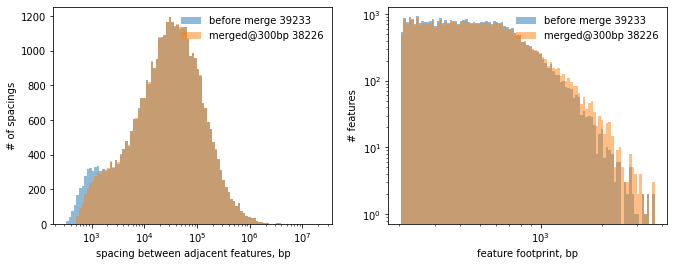

In [7]:
merge_radius = 300
df_merged = bf.merge(df, min_dist=merge_radius)
print(f"number of candidate features before and after merging: {len(df)} -> {len(df_merged)}")

plot_spacing_footprint_distros({
    "before merge" : df,
    f"merged@{merge_radius}bp" : df_merged,
})

### let's have the original CTCF and RAD21 peak calls here to do count them along our stackups as well...

In [8]:
# # here is very-very liberal list of CTCF calls in hg19, based on "MA0139.1.meme" from JASPAR
# # P-val cutoff was 1e-4 - let's see how it looks here ...
# !scp ghpcc:/nl/umw_job_dekker/users/sv49w/ALV2021/CTCF_motif/CTCF.hist.txt ./CTCF.MA0139.1.txt

# require tr -s '\t' - to remove duplicated tabs
ctcf_motif = bioframe.read_table(
    "CTCF.MA0139.1.txt",
    names=["name","chrom","start","end","strand","score","pval","seq"],
    sep="\t",
    index_col = None
)
ctcf_motif = ctcf_motif.sort_values(["chrom","start"])
ctcf_motif = ctcf_motif[ ctcf_motif["chrom"].isin(autosomal_chroms) ]
ctcf_motif = ctcf_motif.reset_index(drop=True)
# ctcf_motif = bf.merge(ctcf_motif, min_dist=merge_radius)
ctcf_motif.head()

name chrom  start    end strand     score          pval  \
0  MA0139.1  chr1  10471  10489      -  11.63930  1.480000e-05   
1  MA0139.1  chr1  11164  11182      -   9.88525  3.300000e-05   
2  MA0139.1  chr1  11223  11241      -  26.42620  2.200000e-10   
3  MA0139.1  chr1  11281  11299      -  24.68850  1.970000e-09   
4  MA0139.1  chr1  11340  11358      -  14.37700  3.720000e-06   

                   seq  
0  GGGCCGGCTGAGGGTACCG  
1  CTGCAAGCAAGGGGCGGTC  
2  TCGCCAGCAGGGGGCGCCC  
3  GCGCCAGCAGGGGGCGCTG  
4  CTGCCAGCAGGCGGCGTGC

In [9]:
# ! ssh ghpcc ls /nl/umw_job_dekker/users/av90w/projects/for-paper/for-higlass/CTCF-indep-AT-motif-fimo.bed
# ! scp ghpcc:/nl/umw_job_dekker/users/av90w/projects/for-paper/for-higlass/CTCF-indep-AT-motif-fimo.bed ./
# ! head CTCF-indep-AT-motif-fimo.bed
# bioframe is short for bioframe here ...
Tfimo_df = bioframe.read_table(
    "CTCF-indep-AT-motif-fimo.bed",
    names=["chrom","start","end"]
)
Tfimo_df = Tfimo_df.sort_values(["chrom","start"])
Tfimo_df = Tfimo_df[ Tfimo_df["chrom"].isin(autosomal_chroms) ]
Tfimo_df = Tfimo_df.reset_index(drop=True)
# Tfimo_df = bf.merge(Tfimo_df, min_dist=merge_radius)

In [10]:
# ls ../GSE*bed.gz
# require tr -s '\t' - to remove duplicated tabs
G4_minus_polstall = bioframe.read_table(
    "../GSE63874_Na_K_PDS_minus_hits_intersect.bed.gz",
    names=["chrom","start","end"],
    sep="\t",
    index_col = None
)

G4_plus_polstall = bioframe.read_table(
    "../GSE63874_Na_K_PDS_plus_hits_intersect.bed.gz",
    names=["chrom","start","end"],
    sep="\t",
    index_col = None
)
G4_plus_polstall = G4_plus_polstall.sort_values(["chrom","start"])
G4_plus_polstall = G4_plus_polstall[ G4_plus_polstall["chrom"].isin(autosomal_chroms) ]
G4_plus_polstall = G4_plus_polstall.reset_index(drop=True)
print(f"G4+ alone {len(G4_plus_polstall)} ...")

G4_minus_polstall = G4_minus_polstall.sort_values(["chrom","start"])
G4_minus_polstall = G4_minus_polstall[ G4_minus_polstall["chrom"].isin(autosomal_chroms) ]
G4_minus_polstall = G4_minus_polstall.reset_index(drop=True)
print(f"G4- alone {len(G4_minus_polstall)} ...")

G4_polstall = bf.merge(
    pd.concat([G4_plus_polstall,G4_minus_polstall]).reset_index(drop=True)
)
G4_polstall = G4_polstall.sort_values(["chrom","start"]).reset_index(drop=True)
print(f"G4-+ together {len(G4_polstall)}, would have been {len(G4_plus_polstall)+len(G4_minus_polstall)} ...")
G4_polstall.head()
# pd.concat([G4_plus_polstall,G4_min_polstall])

G4+ alone 198824 ...
G4- alone 195394 ...
G4-+ together 378344, would have been 394218 ...


chrom  start    end  n_intervals
0  chr1   9999  10524            1
1  chr1  15058  15238            1
2  chr1  16680  16770            1
3  chr1  16785  16858            1
4  chr1  21143  21593            1

In [11]:
# bioframe is short for bioframe here ...
ctcf_df = bioframe.read_table(
    "NT-CTCF-narrowPeaks-sort-merge",
    names=["chrom","start","end"]
)
ctcf_df = ctcf_df.sort_values(["chrom","start"])
ctcf_df = ctcf_df[ ctcf_df["chrom"].isin(autosomal_chroms) ]
ctcf_df = ctcf_df.reset_index(drop=True)
ctcf_df = bf.merge(ctcf_df, min_dist=merge_radius)

In [12]:
rad21_df = bioframe.read_table(
    "NT-RAD21-narrowPeaks-sort-merge",
    names=["chrom","start","end"]
)
rad21_df = rad21_df.sort_values(["chrom","start"])
rad21_df = rad21_df[ rad21_df["chrom"].isin(autosomal_chroms) ]
rad21_df = rad21_df.reset_index(drop=True)
rad21_df = bf.merge(rad21_df, min_dist=merge_radius)

In [13]:
rad21_IAA_df = bioframe.read_table(
    "IAA-RAD21-narrowPeaks-sort-merge",
    names=["chrom","start","end"]
)
rad21_IAA_df = rad21_IAA_df.sort_values(["chrom","start"])
rad21_IAA_df = rad21_IAA_df[ rad21_IAA_df["chrom"].isin(autosomal_chroms) ]
rad21_IAA_df = rad21_IAA_df.reset_index(drop=True)
rad21_IAA_df = bf.merge(rad21_IAA_df, min_dist=merge_radius)

### after we explored how our features (intervals) are spaced and distributed
#### we can move on to the stackups - for different samples, different types of tracks, etc

In [14]:
#let's describe our samples that we want to have in Figure 1 ...
fig1_samples = ["ctcf","noctcf","rad21_CTCF","rad21_noCTCF","ins_CTCF","ins_noCTCF","G4a_r2"]#,"ddx_CTCF","ddx_noCTCF"]

titles = fig1_samples

bw_fnames = OrderedDict()
binsizes = {}
flanks = {}
limss = {}
cmps = {}
norms = {}
for s in fig1_samples:
    bw_fnames[s] = samples[s]["fname"]
    binsizes[s] = samples[s]["binsize"]
    flanks[s] = samples[s]["flank"]
    limss[s] = samples[s]["crange"]
    cmps[s] = samples[s]["cmap"]
    norms[s] = None

### next is computation heavy step - stackups using bbi ...

In [15]:
# do all stackups with the parameters ...
stackups = {}
for s in bw_fnames:
    print(f"stacking up {s} ...")
    %time stackups[s] = rstacks( bw_fnames[s], df_merged, flank=flanks[s], binsize=binsizes[s] )

stacking up ctcf ...
CPU times: user 5.32 s, sys: 185 ms, total: 5.51 s
Wall time: 5.48 s
stacking up noctcf ...
CPU times: user 4.68 s, sys: 148 ms, total: 4.83 s
Wall time: 4.82 s
stacking up rad21_CTCF ...
CPU times: user 5.15 s, sys: 164 ms, total: 5.31 s
Wall time: 5.3 s
stacking up rad21_noCTCF ...
CPU times: user 4.5 s, sys: 168 ms, total: 4.67 s
Wall time: 4.66 s
stacking up ins_CTCF ...
CPU times: user 3.79 s, sys: 196 ms, total: 3.99 s
Wall time: 3.98 s
stacking up ins_noCTCF ...
CPU times: user 3.78 s, sys: 187 ms, total: 3.97 s
Wall time: 3.96 s
stacking up G4a_r2 ...
CPU times: user 6.76 s, sys: 148 ms, total: 6.91 s
Wall time: 6.88 s


### Normalize insulation stackups - subtract some value from each row in the stackup ...

In [16]:
# Happens in place ! be carefull !
normalize_insulation_stackups_INPLACE(
    stackups_set = stackups,
    ins_keys = [k for k in stackups.keys() if k.startswith("ins")],
    subtract='mean_top',
    subtract_size=7,
)

### starting with some sorting, keeping legacy sorting approaches for now

In [17]:
# def get_peak_strength(_):
#     chrom,start,end = _
#     return bbi.fetch(
#             bw_fnames["ctcf"], # just an NT CTCF Chip-Seq signal
#             chrom,
#             start,
#             end,
#             bins=1, # extract whole footprint of the peak into 1 value ...
#             missing=0.0,
#             oob=np.nan,
#             summary='mean',
#         )[0]
# ctcf_peak_strength = df_merged[["chrom","start","end"]].apply(get_peak_strength,axis=1)
# bw_fnames["ctcf"]

In [18]:
length,width = stackups['ctcf'].shape
center_bin = int(width/2)
stackups['ctcf_mean'] = np.nanmean(stackups['ctcf'][:,center_bin-1:center_bin+1],axis=1)
# stackups['rad21_mean'] = np.nanmean(stackups['rad21_CTCF'][:,center_bin-2:center_bin+2],axis=1)
# stackups['sort_metric'] = np.log(stackups['ctcf_mean']) + 0.33*stackups['rad21_mean']

ins_samples = [s for s in fig1_samples if s.startswith("ins")]
# insulation
for s in ins_samples:
    limss[s] = (-.352,-.153)
    cmps[s] = cmapYlGnBu_r

    
    
initial_index = np.arange( len(stackups['ctcf_mean']) )
ks = [('ctcf_mean', "sort", 1, False)]
# ks = [('RAD21_mean',"sort",5),('RAD21_IAA_mean',"sort",1),  ]
_, jjj = recursive_data_ordering( ks, initial_index, stackups, verbose=True)


sorting 38226 elements of ctcf_mean into 1 groups ...


### calculate running average (in chunks of 100) number of called peaks along the stackup

In [19]:
CHUNK_SIZE = 100

index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
ctcf_peaks_sorted = []
for ii in index_chunks:
    _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
    _df2 = ctcf_df
    ctcf_peaks_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())


In [20]:
index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
rad21_peaks_sorted = []
for ii in index_chunks:
    _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
    _df2 = rad21_df
    rad21_peaks_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

103210


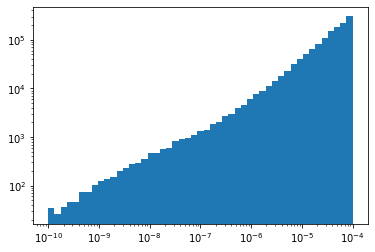

In [21]:
# HOW DO WE CUTOFF P-VALUE FOR THE ctcf MOTIF ...
gggg = ctcf_motif["pval"].values

bins = np.geomspace(1e-10,1e-4)
plt.hist(gggg,log=True,bins=bins)
plt.gca().set_xscale("log")

print((ctcf_motif["pval"]<5e-6).sum())

In [22]:
index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
ctcf_motif_sorted = []
# pre-filter and pre-merge dataframe of CTCF motifs because 
_df2 = bf.merge(ctcf_motif[ctcf_motif["pval"]<5e-6].reset_index(drop=True), min_dist=merge_radius)
# _df2 = bf.merge(ctcf_motif[ctcf_motif["pval"]<5e-6].reset_index(drop=True), min_dist=merge_radius)
for ii in index_chunks:
    _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
    ctcf_motif_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

In [23]:
# G4_polstall
index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
G4_polstall_sorted = []
# pre-filter and pre-merge dataframe of CTCF motifs because 
_df2 = G4_polstall # works as is !!!
# _df2 = bf.merge(G4_polstall, min_dist=merge_radius).reset_index(drop=True)
for ii in index_chunks:
    _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
    G4_polstall_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

In [24]:
# Tfimo_df T-rich "motif" that we discover in CTCF-independent group
index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
Tfimo_sorted = []
_df2 = Tfimo_df
for ii in index_chunks:
    _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
    Tfimo_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

In [25]:
# check motif analyses using http://bardet.u-strasbg.fr/tfmotifview/?results=jLGFM6DuQKEcw8

In [26]:
# index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
# rad21IAA_peaks_sorted = []
# for ii in index_chunks:
#     _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
#     _df2 = rad21_IAA_df
#     rad21IAA_peaks_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())

#### plotting those running averages is integrated into `plot_stackups` function ...

In [27]:
index_chunks = chunked(df_merged.loc[jjj].index, CHUNK_SIZE)
Number_of_chunks = len(list(index_chunks))
print(Number_of_chunks)

383


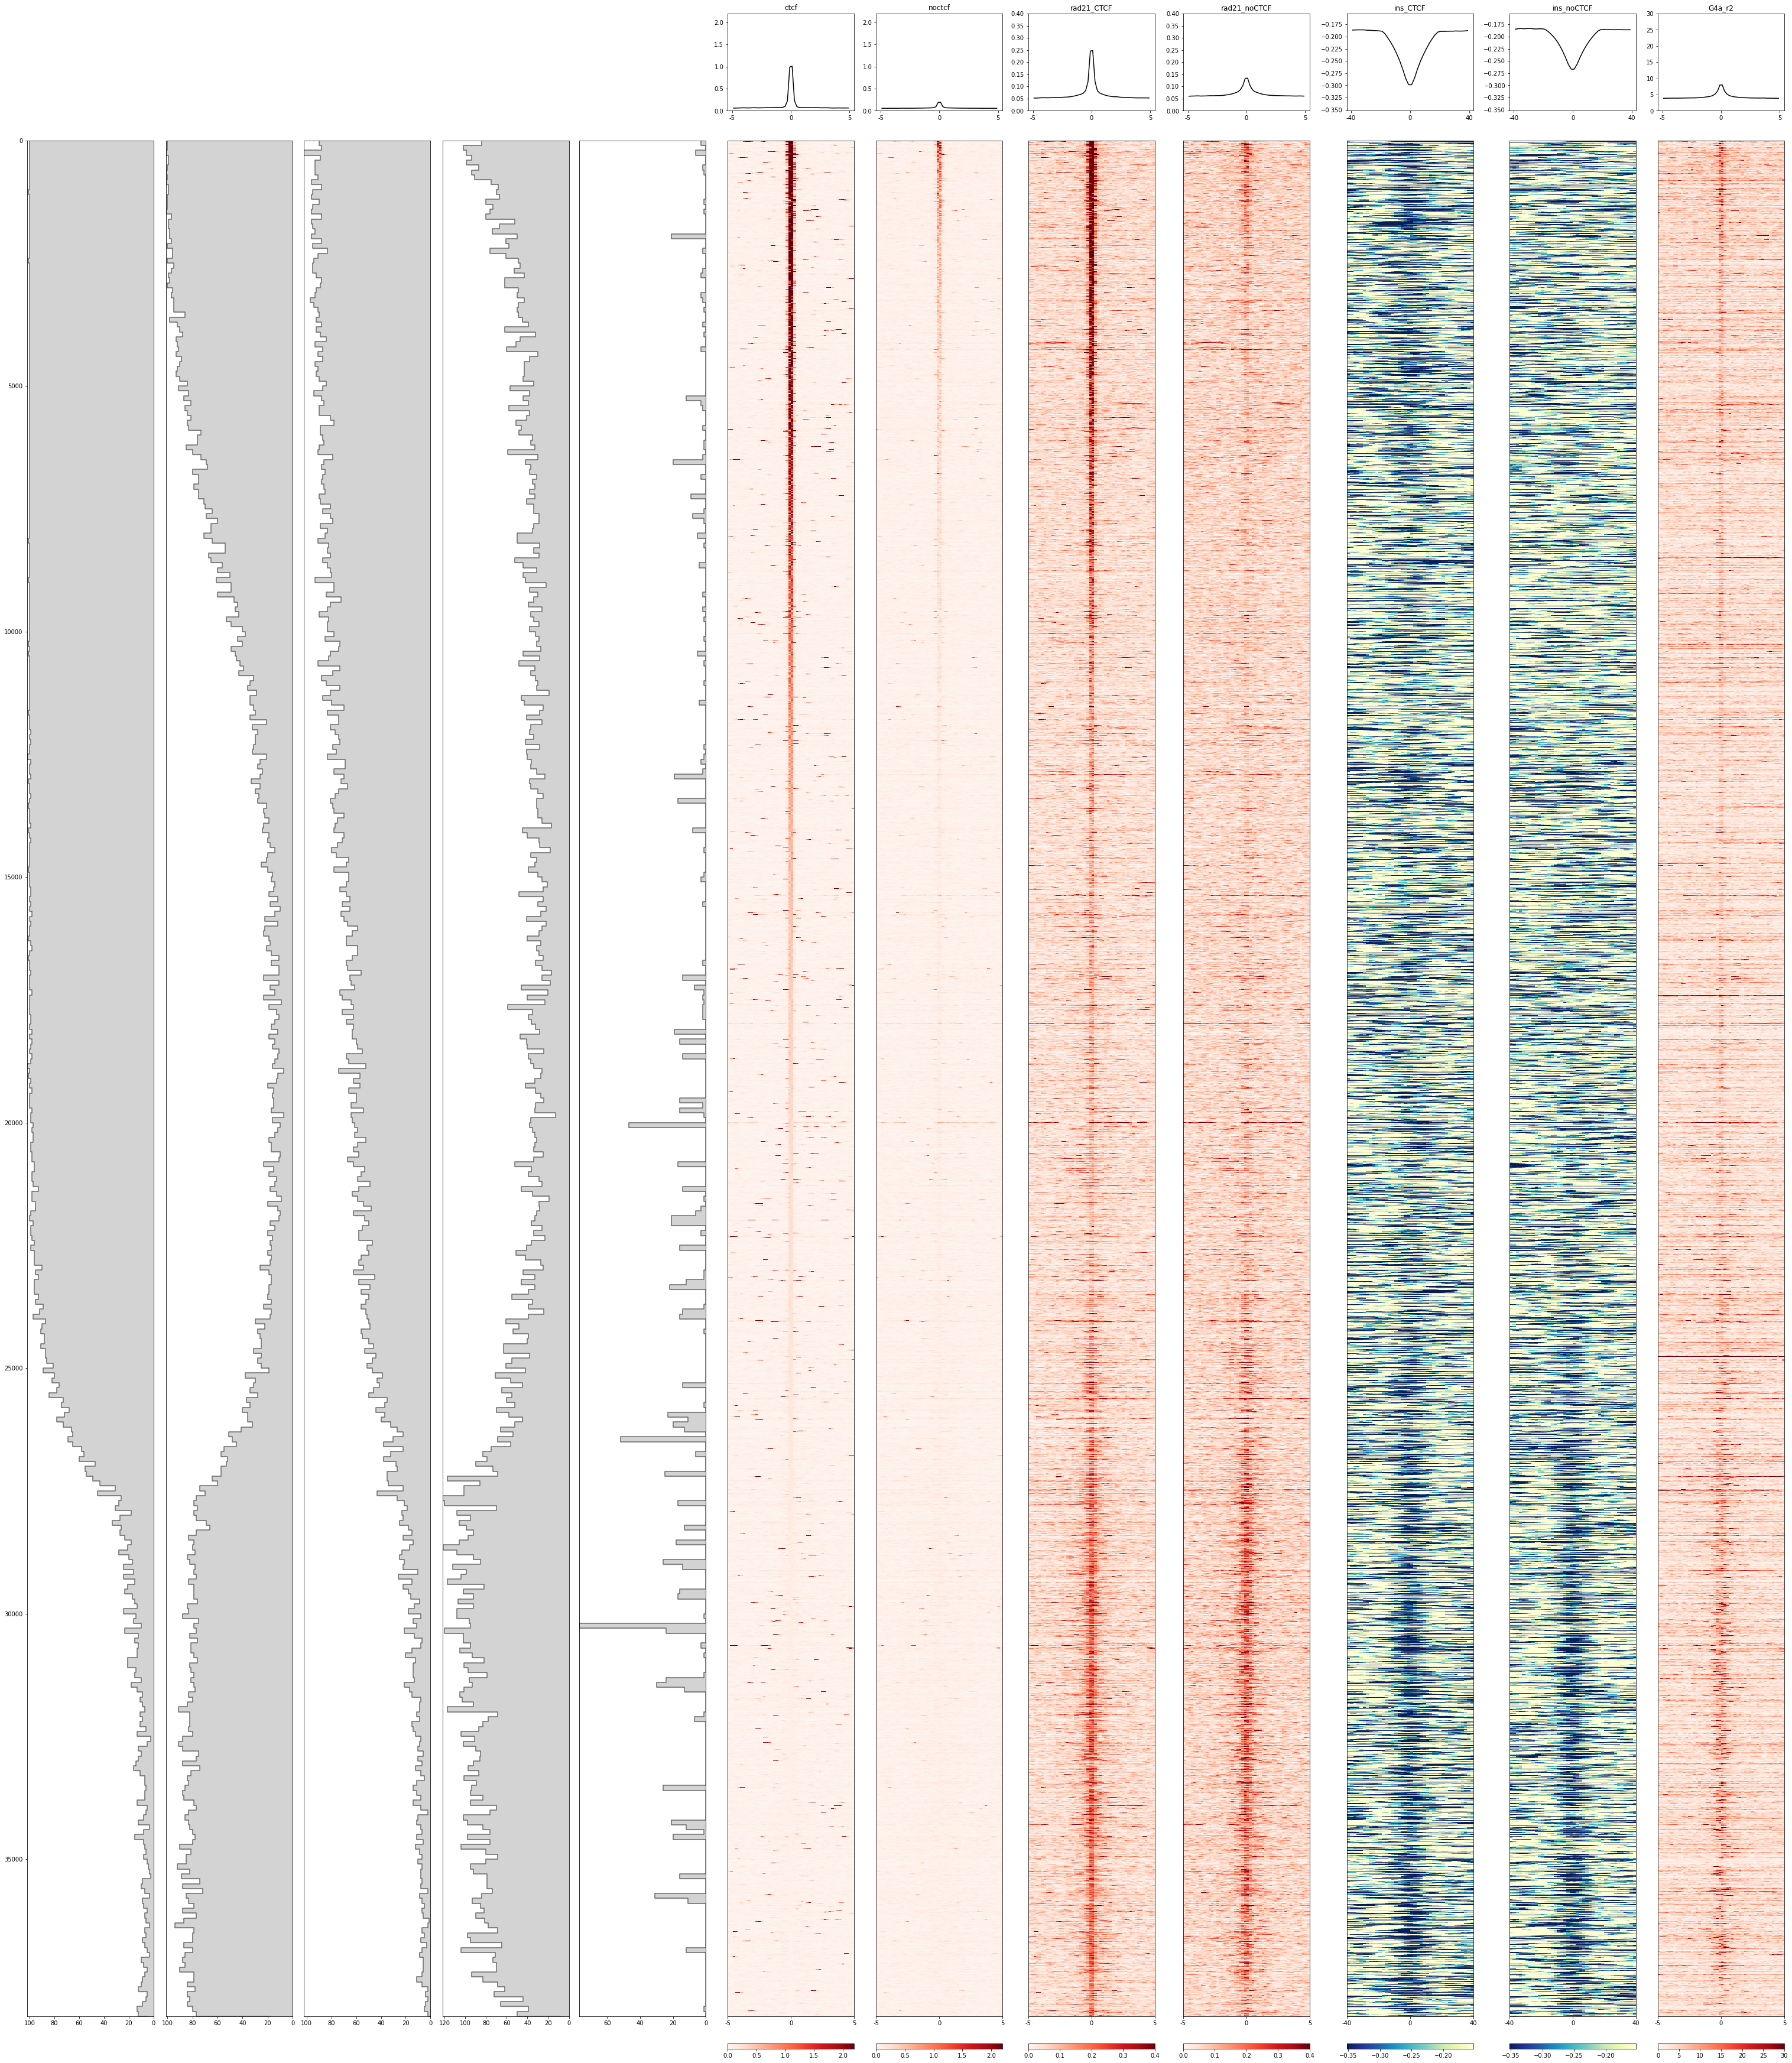

In [28]:
hmss = [ stackups[_k][jjj] for _k in fig1_samples ]
_limss = [ limss[_k] for _k in fig1_samples ]
_cmps = [ cmps[_k] for _k in fig1_samples ]
_binsizes = [ binsizes[_k] for _k in fig1_samples ]
_norms = [ norms[_k] for _k in fig1_samples ]

xtra_plots = [
    (np.arange(Number_of_chunks), ctcf_peaks_sorted, "lightgrey"),
    (np.arange(Number_of_chunks), rad21_peaks_sorted, "lightgrey"),
    (np.arange(Number_of_chunks), ctcf_motif_sorted, "lightgrey"),
    (np.arange(Number_of_chunks), G4_polstall_sorted, "lightgrey"),
    (np.arange(Number_of_chunks), Tfimo_sorted, "lightgrey"),
#     (np.arange(393), rad21IAA_peaks_sorted, "lightgrey")
]

plot_stackups(xtra_plots, hmss,titles, _limss, _cmps, _norms, _binsizes, fname="xxx.pdf", fillmissing=False, interpolation="nearest")

### let's plot zoom-ins into CTCF dependent and CTCF independent subsets ...

sorting 10000 elements of G4_mean into 1 groups ...


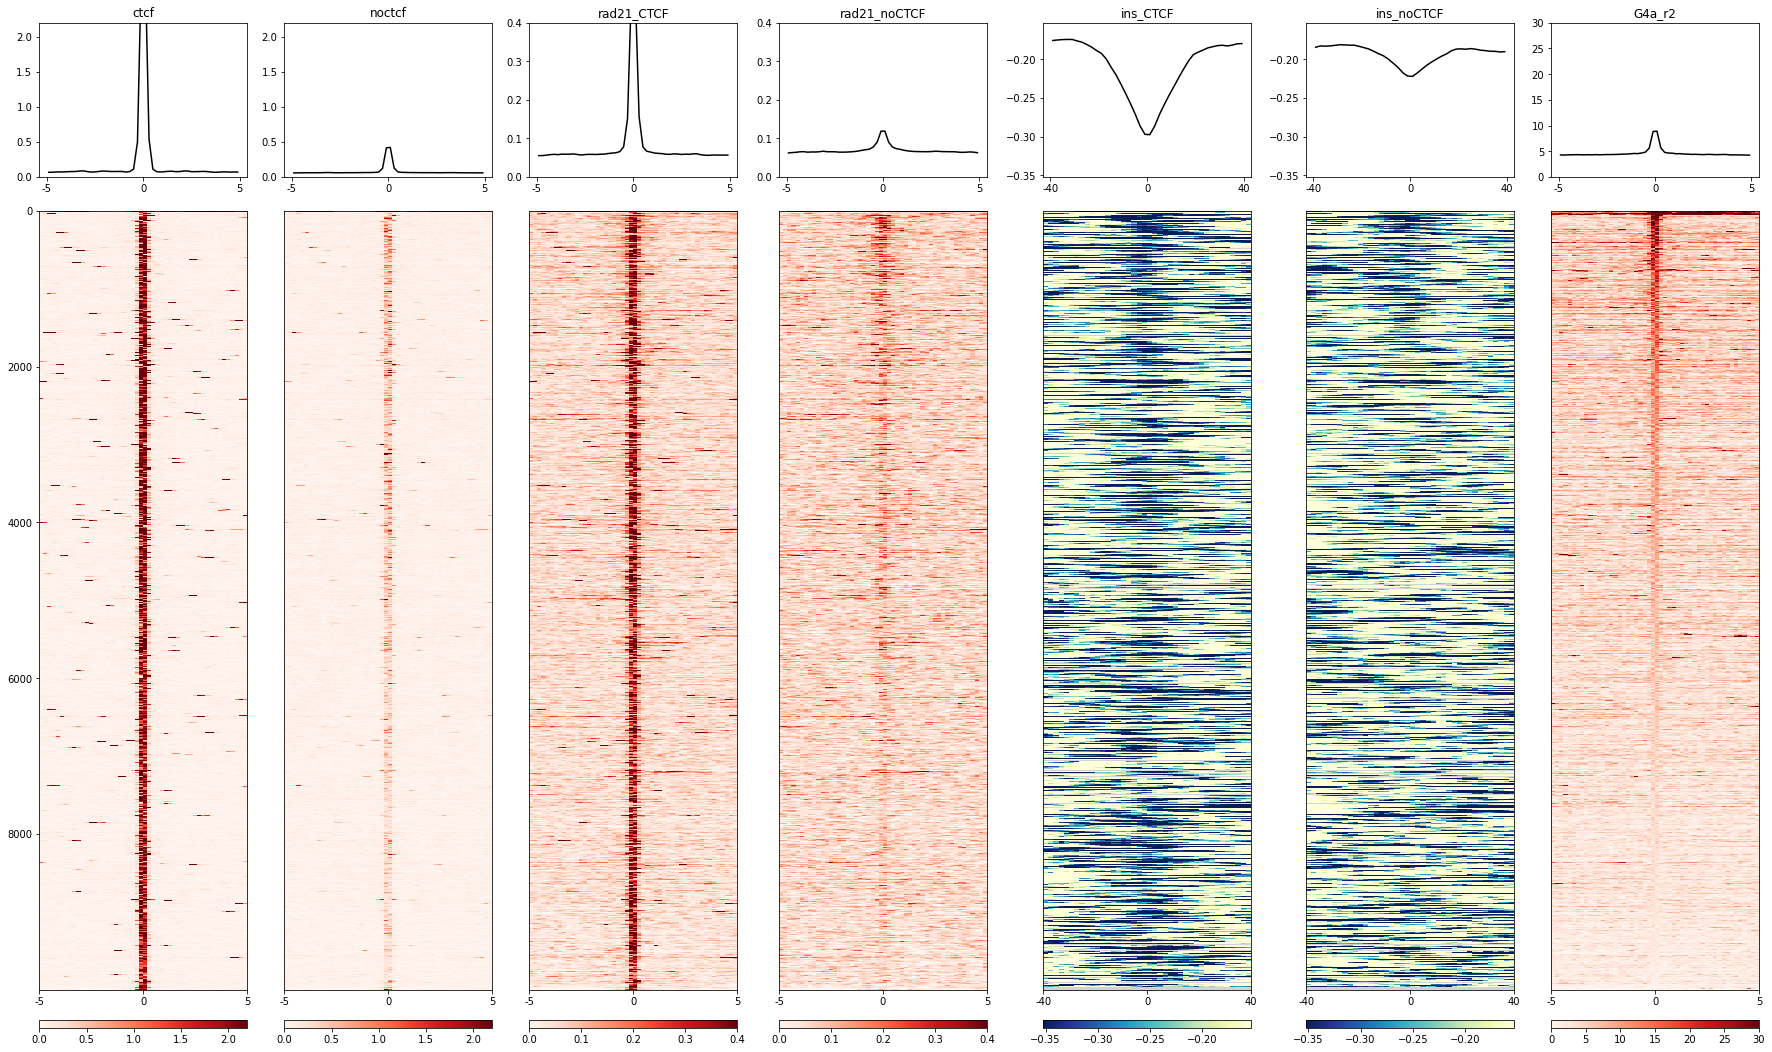

In [29]:
# let's take ~10'000 strongest CTCF harboring RAD21 peak
iii = jjj[:10_000]
_l, _w = stackups['G4a_r2'].shape
_cent = int(_w/2)
tmp_dict = {}
tmp_dict['G4_mean'] = np.nanmean(stackups['G4a_r2'][iii,_cent-1:_cent+1],axis=1)

# _l, _w = stackups['ins_CTCF'].shape
# _cent = int(_w/2)
# tmp_dict = {}
# tmp_dict["ins"] = np.nanmean(stackups['ins_CTCF'][iii,_cent-2:_cent+2],axis=1)

ks = [('G4_mean', "sort", 1, False)]
_, iii_reord = recursive_data_ordering( ks, np.arange(len(iii)), tmp_dict, verbose=True)

hmss = [ stackups[_k][iii[iii_reord]] for _k in fig1_samples ]
_limss = [ limss[_k] for _k in fig1_samples ]
_cmps = [ cmps[_k] for _k in fig1_samples ]
_binsizes = [ binsizes[_k] for _k in fig1_samples ]
_norms = [ norms[_k] for _k in fig1_samples ]

plot_stackups(None, hmss,titles,_limss,_cmps,_norms,_binsizes,fname="Fig1_masterlist_CTCFdep.pdf",fillmissing=False,interpolation="nearest")
# plot_stackups(None, hmss,titles,_limss,_cmps,_norms,_binsizes,fname="xxx.pdf",fillmissing=False,interpolation="nearest")
df_merged.loc[ iii[iii_reord] ][["chrom","start","end"]].to_csv("masterlist_CTCFdependent.bed",sep="\t",index=False,header=False)


sorting 10000 elements of G4_mean into 1 groups ...


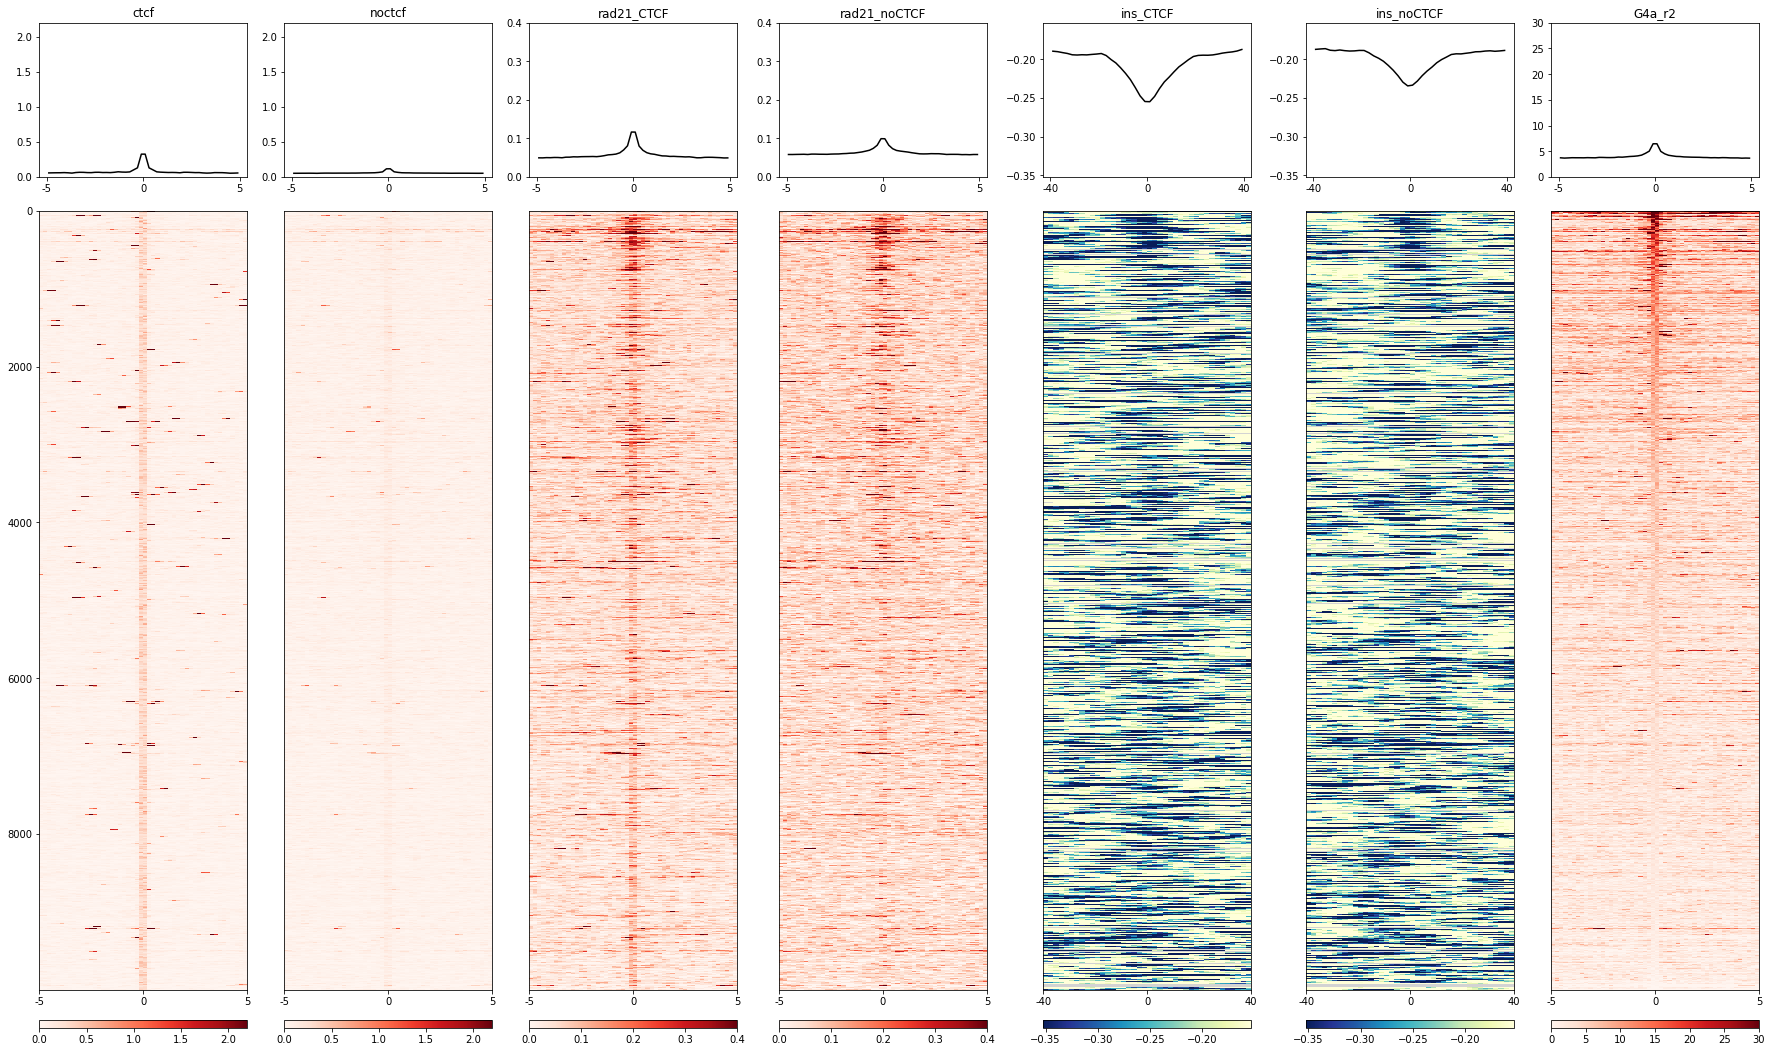

In [30]:
# let's take ~10'000 weakest CTCF harboring RAD21 peak
iii = jjj[15_000:25_000]


_l, _w = stackups['G4a_r2'].shape
_cent = int(_w/2)
tmp_dict = {}
tmp_dict['G4_mean'] = np.nanmean(stackups['G4a_r2'][iii,_cent-1:_cent+1],axis=1)

# _l, _w = stackups['ins_CTCF'].shape
# _cent = int(_w/2)
# tmp_dict = {}
# tmp_dict["ins"] = np.nanmean(stackups['ins_CTCF'][iii,_cent-2:_cent+2],axis=1)

ks = [('G4_mean', "sort", 1, False)]
_, iii_reord = recursive_data_ordering( ks, np.arange(len(iii)), tmp_dict, verbose=True)

hmss = [ stackups[_k][iii[iii_reord]] for _k in fig1_samples ]
_limss = [ limss[_k] for _k in fig1_samples ]
_cmps = [ cmps[_k] for _k in fig1_samples ]
_binsizes = [ binsizes[_k] for _k in fig1_samples ]
_norms = [ norms[_k] for _k in fig1_samples ]

plot_stackups(None,hmss,titles,_limss,_cmps,_norms,_binsizes,fname="Fig1_masterlist_CTCFmiddle.pdf",fillmissing=False,interpolation="nearest")
df_merged.loc[ iii[iii_reord] ][["chrom","start","end"]].to_csv("masterlist_CTCFmiddle.bed",sep="\t",index=False,header=False)
# masterlist_CTCFmiddle.bed

sorting 10000 elements of G4_mean into 1 groups ...


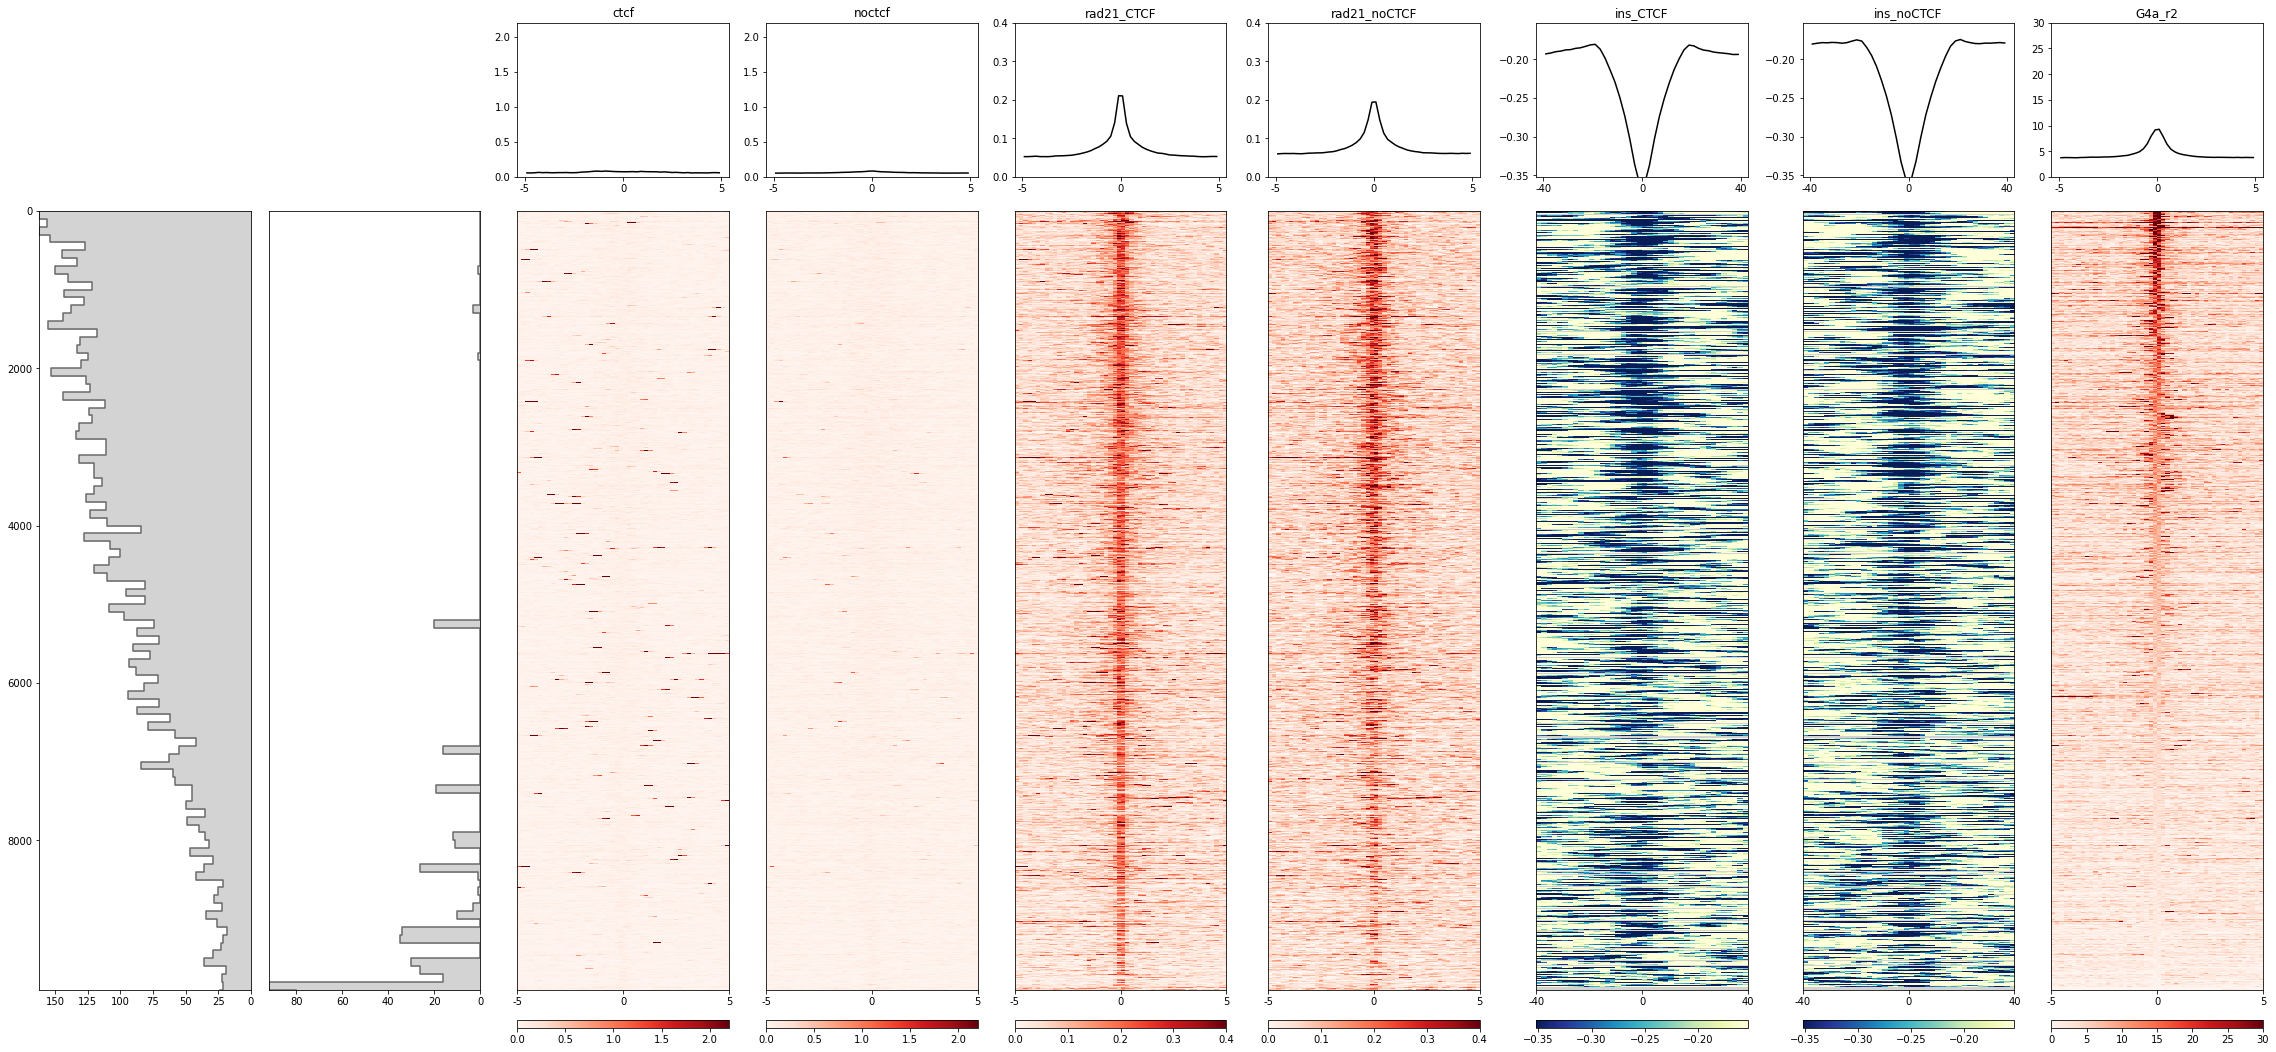

In [31]:
# let's take ~10'000 weakest CTCF harboring RAD21 peak
iii = jjj[-10_000:]


_l, _w = stackups['G4a_r2'].shape
_cent = int(_w/2)
tmp_dict = {}
tmp_dict['G4_mean'] = np.nanmean(stackups['G4a_r2'][iii,_cent-1:_cent+1],axis=1)

# _l, _w = stackups['ins_CTCF'].shape
# _cent = int(_w/2)
# tmp_dict = {}
# tmp_dict["ins"] = np.nanmean(stackups['ins_CTCF'][iii,_cent-2:_cent+2],axis=1)

ks = [('G4_mean', "sort", 1, False)]
_, iii_reord = recursive_data_ordering( ks, np.arange(len(iii)), tmp_dict, verbose=True)


# Tfimo_df T-rich "motif" that we discover in CTCF-independent group
index_chunks = chunked(df_merged.loc[iii[iii_reord]].index, CHUNK_SIZE)
Tfimo_sorted = []
G4_polstall_sorted = []
_df2 = Tfimo_df
_df3 = G4_polstall # works as is !!!
Number_of_chunks = 0
for ii in index_chunks:
    _df1 = df_merged.loc[ii][["chrom","start","end"]].reset_index(drop=True)
    Tfimo_sorted.append(bioframe.count_overlaps(_df1, _df2 )["count"].sum())
    G4_polstall_sorted.append(bioframe.count_overlaps(_df1, _df3 )["count"].sum())
    Number_of_chunks += 1

xtra_plots = [
#     (np.arange(Number_of_chunks), ctcf_peaks_sorted, "lightgrey"),
#     (np.arange(Number_of_chunks), rad21_peaks_sorted, "lightgrey"),
#     (np.arange(Number_of_chunks), ctcf_motif_sorted, "lightgrey"),
    (np.arange(Number_of_chunks), G4_polstall_sorted, "lightgrey"),
    (np.arange(Number_of_chunks), Tfimo_sorted, "lightgrey"),
#     (np.arange(393), rad21IAA_peaks_sorted, "lightgrey")
]


hmss = [ stackups[_k][iii[iii_reord]] for _k in fig1_samples ]
_limss = [ limss[_k] for _k in fig1_samples ]
_cmps = [ cmps[_k] for _k in fig1_samples ]
_binsizes = [ binsizes[_k] for _k in fig1_samples ]
_norms = [ norms[_k] for _k in fig1_samples ]

plot_stackups(xtra_plots,hmss,titles,_limss,_cmps,_norms,_binsizes,fname="xxx.pdf",fillmissing=False,interpolation="nearest")
# # plot_stackups(None,hmss,titles,_limss,_cmps,_norms,_binsizes,fname="xxx.pdf",fillmissing=False,interpolation="nearest")
# df_merged.loc[ iii[iii_reord] ][["chrom","start","end"]].to_csv("masterlist_CTCFindependent.bed",sep="\t",index=False,header=False)

# crazy motif test
df_merged.loc[ iii[iii_reord][-1000:] ][["chrom","start","end"]].to_csv("crazy_motif.bed",sep="\t",index=False,header=False)



In [32]:
# # check what we have here locally ...
# ! ls Fig1*pdf
# ! ls master*bed
# ! ssh ghpcc ls /nl/umw_job_dekker/users/sv49w/ALV2021

In [33]:
# !scp Fig1_masterlist* ghpcc:/nl/umw_job_dekker/users/sv49w/ALV2021/
# !scp masterlist*.bed ghpcc:/nl/umw_job_dekker/users/sv49w/ALV2021/

### not really needed for Fig1 - just some different examples of sorting the zoom-ins ...

sorting 10000 elements of ins into 1 groups ...


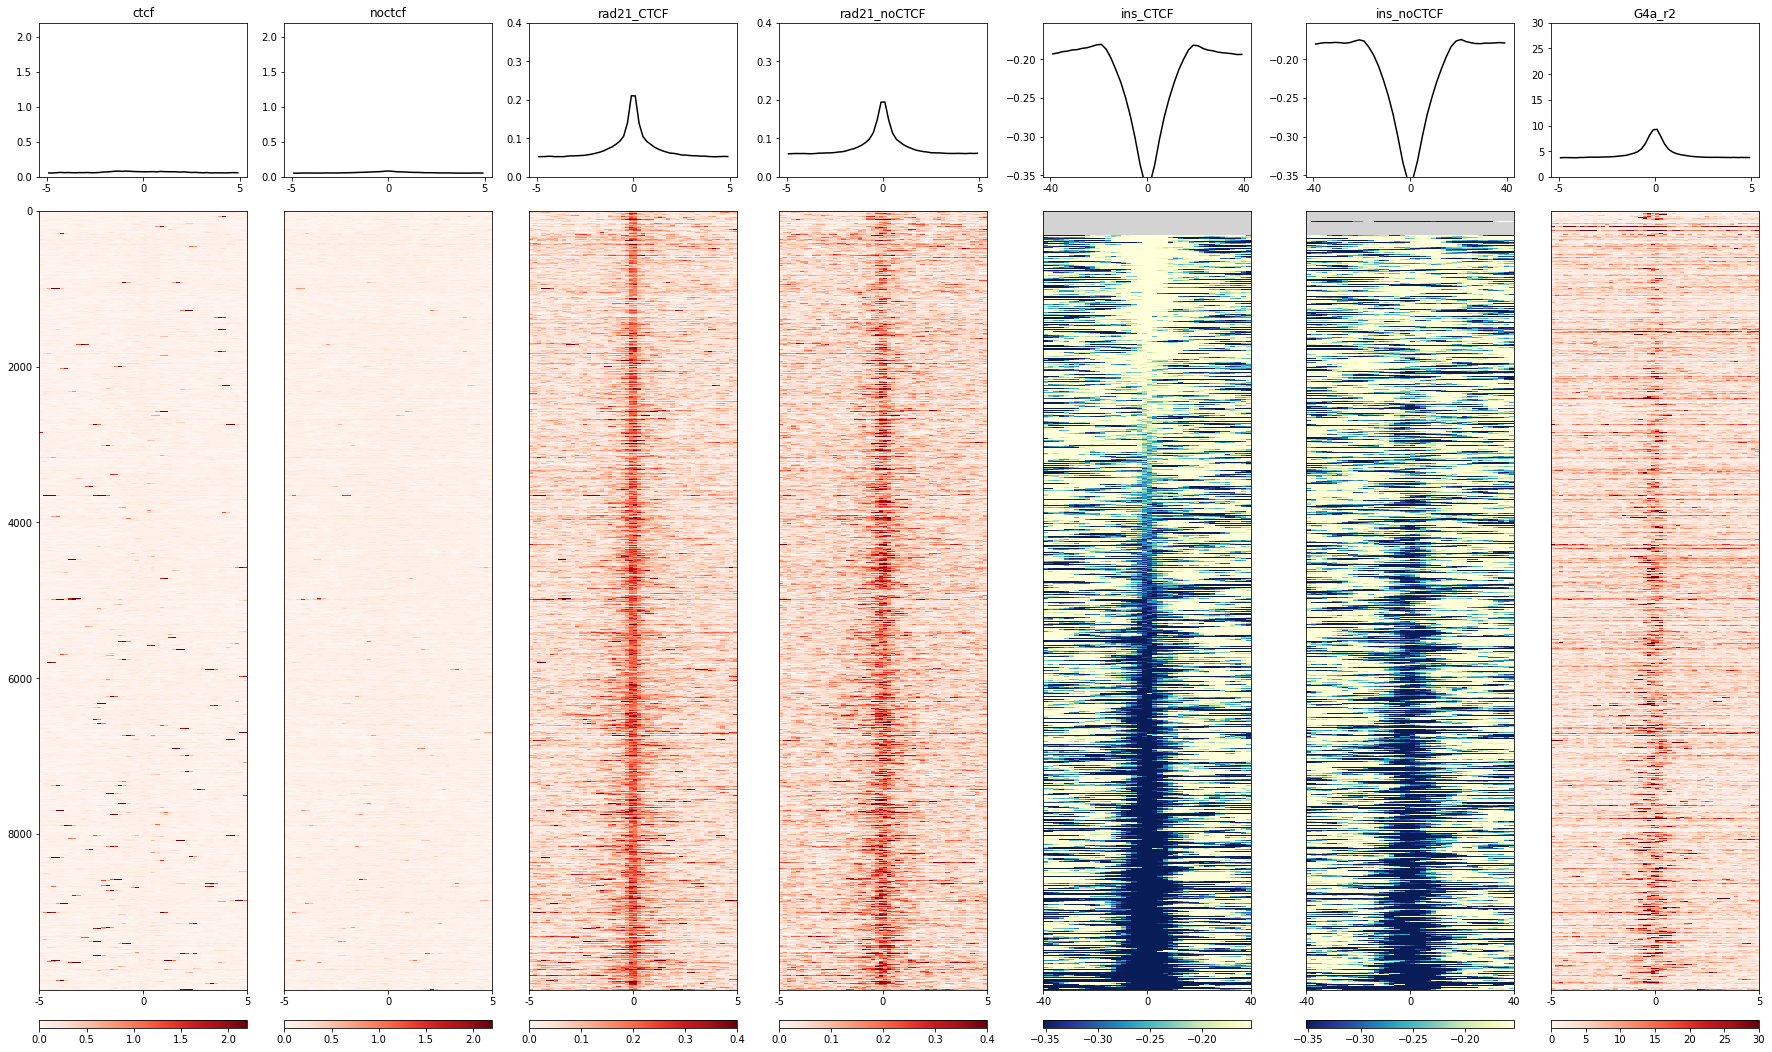

In [34]:
# let's take remaining RAD21 peaks without CTCF (weak CTCF signal)
iii = jjj[-10_000:]

# _l, _w = stackups['G4a_r2'].shape
# _cent = int(_w/2)
# tmp_dict = {}
# tmp_dict['G4_mean'] = np.nanmean(stackups['G4a_r2'][iii,_cent-5:_cent+5],axis=1)

_l, _w = stackups['ins_CTCF'].shape
_cent = int(_w/2)
tmp_dict = {}
tmp_dict["ins"] = np.nanmean(stackups['ins_CTCF'][iii,_cent-2:_cent+2],axis=1)

ks = [('ins', "sort", 1, False)]
_, iii_reord = recursive_data_ordering( ks, np.arange(len(iii)), tmp_dict, verbose=True)


hmss = [ stackups[_k][iii[iii_reord]] for _k in fig1_samples ]
_limss = [ limss[_k] for _k in fig1_samples ]
_cmps = [ cmps[_k] for _k in fig1_samples ]
_binsizes = [ binsizes[_k] for _k in fig1_samples ]
_norms = [ norms[_k] for _k in fig1_samples ]

plot_stackups(None,hmss,titles,_limss,_cmps,_norms,_binsizes,fname="x3.pdf",fillmissing=False,interpolation="nearest")

In [35]:
# df_merged.loc[iii[iii_reord][:2000]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_noINS.bed",sep="\t",index=False,header=False)
# df_merged.loc[iii[iii_reord][3000:5000]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_weakINS.bed",sep="\t",index=False,header=False)
# df_merged.loc[iii[iii_reord][5000:7900]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_mediumINS.bed",sep="\t",index=False,header=False)
# df_merged.loc[iii[iii_reord][9500:]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_strongINS.bed",sep="\t",index=False,header=False)
# # # df_merged.loc[iii[iii_reord][:4000]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_strongG4.bed",sep="\t",index=False,header=False)


In [36]:
# !scp RAD21peaks_noCTCF*INS.bed ghpcc:/nl/umw_job_dekker/users/sv49w/ALV2021/

In [37]:
# df_merged.loc[iii[iii_reord][-2000:]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_noG4.bed",sep="\t",index=False,header=False)
# df_merged.loc[iii[iii_reord][:4000]][["chrom","start","end"]].to_csv("RAD21peaks_noCTCF_strongG4.bed",sep="\t",index=False,header=False)
# !wc -l RAD21peaks_noCTCF_strongG4.bed